In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from bertopic import BERTopic

%matplotlib inline

/home/rodrigochavoni/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('./data_process/tweets_prefeito_vacina_preprocessed2.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27382 entries, 0 to 27381
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                27382 non-null  int64  
 1   created_at                                27382 non-null  object 
 2   text                                      27382 non-null  object 
 3   public_metrics.like_count                 27382 non-null  int64  
 4   public_metrics.quote_count                27382 non-null  int64  
 5   public_metrics.reply_count                27382 non-null  int64  
 6   public_metrics.retweet_count              27382 non-null  int64  
 7   author.id                                 27382 non-null  int64  
 8   author.created_at                         27382 non-null  object 
 9   author.description                        27358 non-null  object 
 10  author.location                   

## Modelo e Base de dados

In [5]:
df = df[['created_at', 'nome_urna', 'sigla_partido' ,'party', 'alignment_with_bolsonaro_government_perc', 'government_or_opposition_position', 'text_Normalized','text']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27382 entries, 0 to 27381
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   created_at                                27382 non-null  object 
 1   nome_urna                                 27382 non-null  object 
 2   sigla_partido                             27382 non-null  object 
 3   party                                     25062 non-null  object 
 4   alignment_with_bolsonaro_government_perc  25062 non-null  float64
 5   government_or_opposition_position         27382 non-null  object 
 6   text_Normalized                           27382 non-null  object 
 7   text                                      27382 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.7+ MB


In [7]:
topic_model = BERTopic.load("modelos_treinados/modelo_final")

In [8]:
list_text = df['text'].tolist()
list_time = pd.to_datetime(df['created_at']).tolist()
df['created_at'] = pd.to_datetime(df['created_at']).dt.strftime('%Y-%m')

In [9]:
topic_info = topic_model.get_topic_info()
document_info = topic_model.get_document_info(list_text)

In [10]:
df_documents = pd.merge(document_info, df, left_index=True, right_index=True)

In [11]:
df_documents

,Document,Topic,Name,CustomName,Representation,Representative_Docs,Top_n_words,Probability,Representative_document,created_at,nome_urna,sigla_partido,party,alignment_with_bolsonaro_government_perc,government_or_opposition_position,text_Normalized,text
0,O Brasil vai decidir neste ano se é tarado por...,4,4_mortes_não_morte_mil,Impacto do COVID-19,"[mortes, não, morte, mil, hospital, covid, são...",[estado são paulo registrou novas mortes provo...,mortes - não - morte - mil - hospital - covid ...,0.246750,False,2022-01,DANIEL ZEN,PT,PT,20.0,Oposição,brasil vai decidir neste ano é tarado vacina m...,O Brasil vai decidir neste ano se é tarado por...
1,"Não deu nem 5 dias da Operação Ptolomeu, que a...",-1,-1_não_crianças_hoje_dia,Ruído,"[não, crianças, hoje, dia, mãe, são, anos, sob...",[dia nacional combate abuso exploração sexual ...,não - crianças - hoje - dia - mãe - são - anos...,1.000000,False,2021-12,DANIEL ZEN,PT,PT,20.0,Oposição,não deu dias operação ptolomeu abalou estrutur...,"Não deu nem 5 dias da Operação Ptolomeu, que a..."
2,O que vou pedir ao Papai Noel como presente de...,-1,-1_não_crianças_hoje_dia,Ruído,"[não, crianças, hoje, dia, mãe, são, anos, sob...",[dia nacional combate abuso exploração sexual ...,não - crianças - hoje - dia - mãe - são - anos...,0.940921,False,2021-12,DANIEL ZEN,PT,PT,20.0,Oposição,vou pedir papai noel presente natal ano é rest...,O que vou pedir ao Papai Noel como presente de...
3,3/3 1°: porque o mosaico símbolo do autismo é ...,2,2_vacina_brasil_não_coronavac,Avanço da Vacina,"[vacina, brasil, não, coronavac, doses, vacina...",[vacinasim hoje chegou amapá doses vacinas con...,vacina - brasil - não - coronavac - doses - va...,0.000376,False,2021-12,DANIEL ZEN,PT,PT,20.0,Oposição,porque mosaico símbolo autismo é bem diferente...,3/3 1°: porque o mosaico símbolo do autismo é ...
4,"2/3 Agora, nesse episódio do pórtico do Parque...",0,0_vacinação_vacina_não_anos,Informativos de Vacinação,"[vacinação, vacina, não, anos, dose, contra, p...",[bom dia pessoal hoje avançamos plano imunizaç...,vacinação - vacina - não - anos - dose - contr...,0.000375,False,2021-12,DANIEL ZEN,PT,PT,20.0,Oposição,agora nesse episódio pórtico parque maternidad...,"2/3 Agora, nesse episódio do pórtico do Parque..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27377,Vacinação será sopro de esperança e controle d...,0,0_vacinação_vacina_não_anos,Informativos de Vacinação,"[vacinação, vacina, não, anos, dose, contra, p...",[bom dia pessoal hoje avançamos plano imunizaç...,vacinação - vacina - não - anos - dose - contr...,0.412110,False,2021-01,VANDA MONTEIRO,PSL,PSL,97.0,Governo,vacinação será sopro esperança controle pandem...,Vacinação será sopro de esperança e controle d...
27378,Hoje soubemos da morte do ex-governador e pref...,4,4_mortes_não_morte_mil,Impacto do COVID-19,"[mortes, não, morte, mil, hospital, covid, são...",[estado são paulo registrou novas mortes provo...,mortes - não - morte - mil - hospital - covid ...,0.274550,False,2021-01,VANDA MONTEIRO,PSL,PSL,97.0,Governo,hoje soubemos morte prefeito licenciado goiâni...,Hoje soubemos da morte do ex-governador e pref...
27379,Vacinação dos profissionais da saúde deve ser ...,-1,-1_não_crianças_hoje_dia,Ruído,"[não, crianças, hoje, dia, mãe, são, anos, sob...",[dia nacional combate abuso exploração sexual ...,não - crianças - hoje - dia - mãe - são - anos...,0.629169,False,2021-01,VANDA MONTEIRO,PSL,PSL,97.0,Governo,vacinação profissionais saúde deve caráter eme...,Vacinação dos profissionais da saúde deve ser ...
27380,Vacinação dos profissionais da saúde deve ser ...,0,0_vacinação_vacina_não_anos,Informativos de Vacinação,"[vacinação, vacina, não, anos, dose, contra, p...",[bom dia pessoal hoje avançamos plano imunizaç...,vacinação - vacina - não - anos - dose - contr...,0.164288,False,2021-01,VANDA MONTEIRO,PSL,PSL,97.0,Governo,vacinação profissionais saúde deve caráter eme...,Vacinação dos profissionais da saúde deve ser ...


In [12]:
ed_rodrigues = df_documents[df_documents["nome_urna"] == "GEAN LOUREIRO"]
publicações = ed_rodrigues[ed_rodrigues["created_at"] == "2021-11"]
publicações["CustomName"].value_counts()

CustomName
Informativos de Vacinação      13
Avanço da Vacina                6
Voltas as Aulas Presenciais     4
Impacto do COVID-19             2
Ruído                           1
Name: count, dtype: int64

In [13]:
df_documents['government_or_opposition_position'].value_counts()

government_or_opposition_position
Oposição        16359
Governo          7697
Desconhecido     2320
Neutro           1006
Name: count, dtype: int64

## Canditados e Partidos com mais postagens

In [14]:
## Candidatos por posição
postagem_per_candidadato_Governo = df_documents[df_documents.government_or_opposition_position == 'Governo'].groupby('nome_urna')['nome_urna'].count().sort_values(ascending=False).head(3).index.tolist()
postagem_per_candidadato_Oposicao = df_documents[df_documents.government_or_opposition_position == 'Oposição'].groupby('nome_urna')['nome_urna'].count().sort_values(ascending=False).head(3).index.tolist()

## Partido por posição
postagem_per_partido_Governo = df_documents[df_documents.government_or_opposition_position == 'Governo'].groupby('party')['party'].count().sort_values(ascending=False).head(3).index.tolist()
postagem_per_partido_Oposicao = df_documents[df_documents.government_or_opposition_position == 'Oposição'].groupby('party')['party'].count().sort_values(ascending=False).head(3).index.tolist()

## Remove Ruído

In [15]:
index_ruido = df_documents[df_documents['Topic'] == -1].index
df_documents = df_documents.drop(index_ruido)

## Distribuíção Geral dos Tópicos

<Axes: xlabel='Count', ylabel='CustomName'>

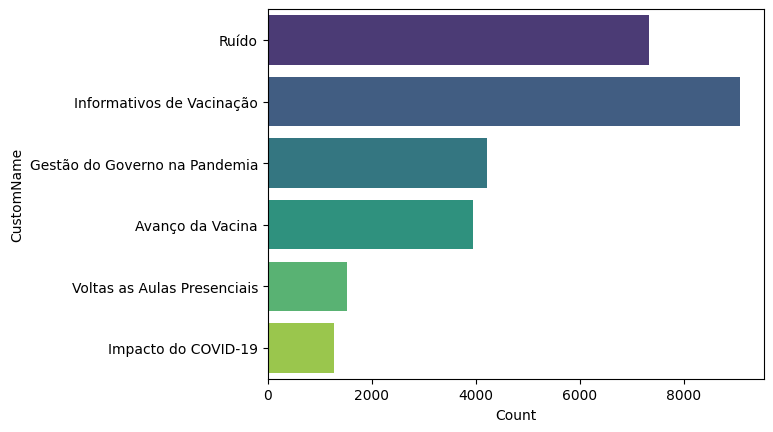

In [16]:
sns.barplot(x="Count", y="CustomName", data=topic_info, palette="viridis")

## Distância entre os Tópicos

In [17]:
topic_model.visualize_topics(custom_labels=['Calendário Vacinal','Gestão do Governo na Pandemia','Avanço da Vacina','Situação da Educação Brasileira','Impacto do COVID-19'])

## Distribuíção das Palavras nos Tópicos

In [18]:
topic_model.visualize_barchart(title='Principais palavras dos Tópicos', topics=[0, 1, 2, 3, 4], custom_labels=['Calendário Vacinal','Gestão do Governo na Pandemia','Avanço da Vacina','Situação da Educação Brasileira','Impacto do COVID-19'])

## Modelagem de Tópicos Temporal

In [19]:
topics_over_time = topic_model.topics_over_time(list_text, list_time, datetime_format="%Y-%m-%d",nr_bins=20)

20it [01:06,  3.35s/it]


In [20]:
topic_model.visualize_topics_over_time(topics_over_time,topics=[0,1,2,3,4], custom_labels=['Calendário Vacinal','Gestão do Governo na Pandemia','Avanço da Vacina','Situação da Educação Brasileira','Mortes de COVID-19']) 

In [21]:
hierarchical_topics = topic_model.hierarchical_topics(list_text)
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 4/4 [00:00<00:00, 32.46it/s]


## Matrix Topic-Document

In [22]:
# Probabilidades dos tópicos
probs = topic_model.probabilities_
probs_df=pd.DataFrame(probs)

# remove as probabilidades dos tópicos de ruído
probs_df = probs_df.drop(index_ruido)

# Cria lista de valores
probs_df['lista_prob'] = probs_df[[0,1,2,3,4]].values.tolist()

In [23]:
df_documents['lista_prob'] = probs_df['lista_prob']

## Distribuição dos Tópicos

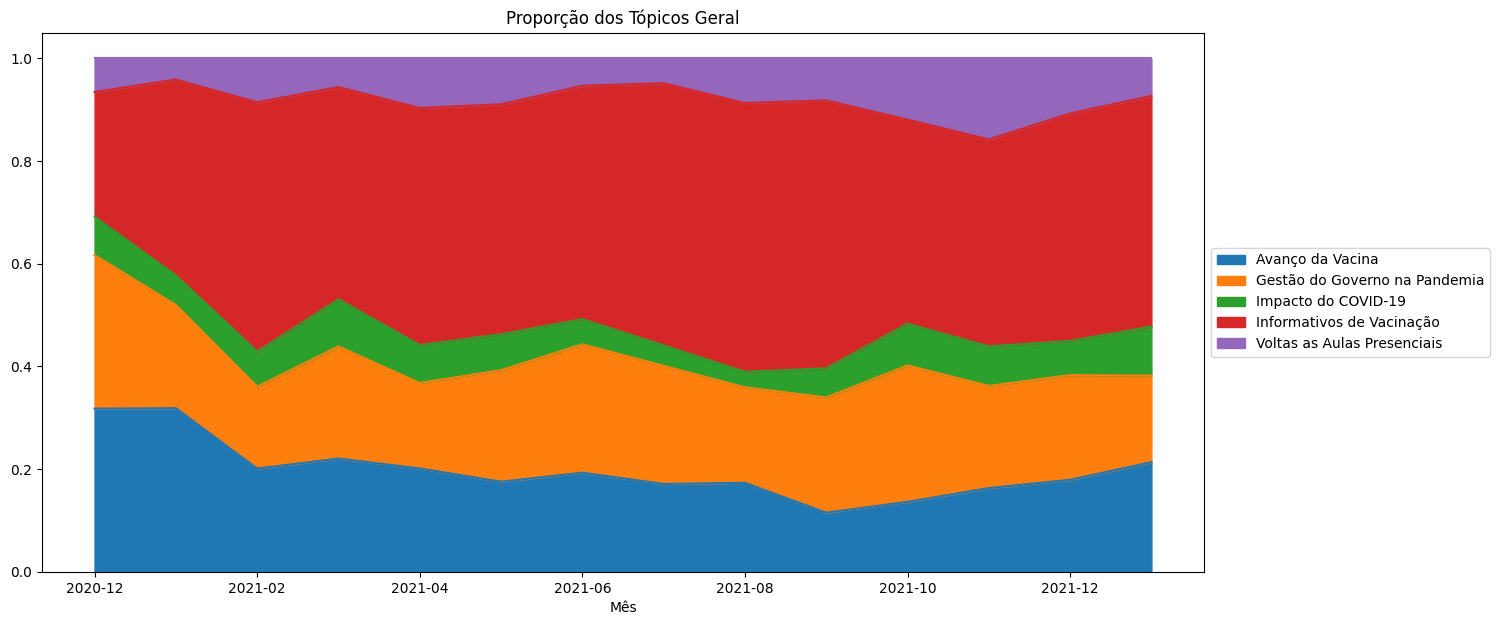

In [24]:
df_topics_count = df_documents.groupby(['created_at', 'CustomName'])['CustomName'].count().unstack(level=1)
df_topics_count.divide(df_topics_count.sum(axis=1), axis=0).plot.area(title = 'Proporção dos Tópicos Geral', xlabel='created_at', figsize=(15,7))
plt.legend('Tópico')
plt.xlabel('Mês')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Distribuição dos Tópicos por Posicionamneto Político

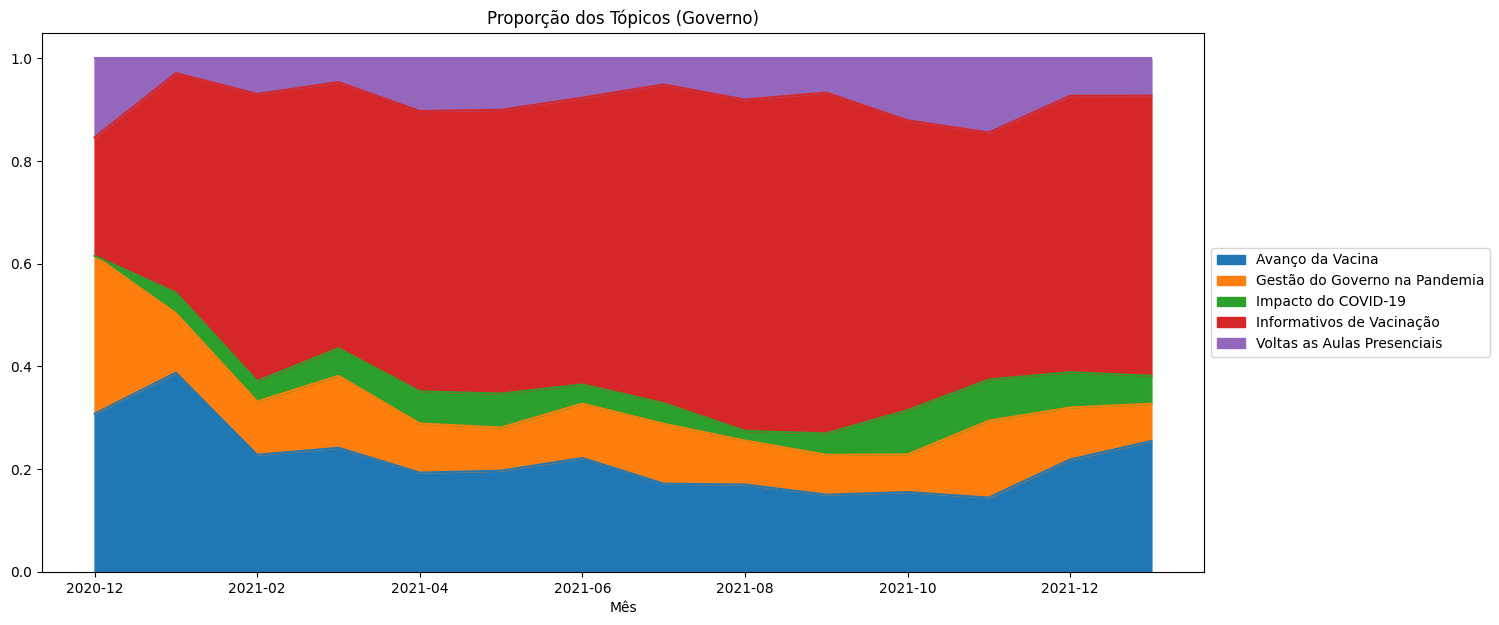

In [25]:

df_topics_count = df_documents[df_documents['government_or_opposition_position'] == 'Governo'].groupby(['created_at', 'CustomName'])['CustomName'].count().unstack(level=1)
df_topics_count.divide(df_topics_count.sum(axis=1), axis=0).plot.area(title = 'Proporção dos Tópicos (Governo)', xlabel='created_at', figsize=(15,7))
plt.legend(title='Tópico')
plt.xlabel('Mês')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

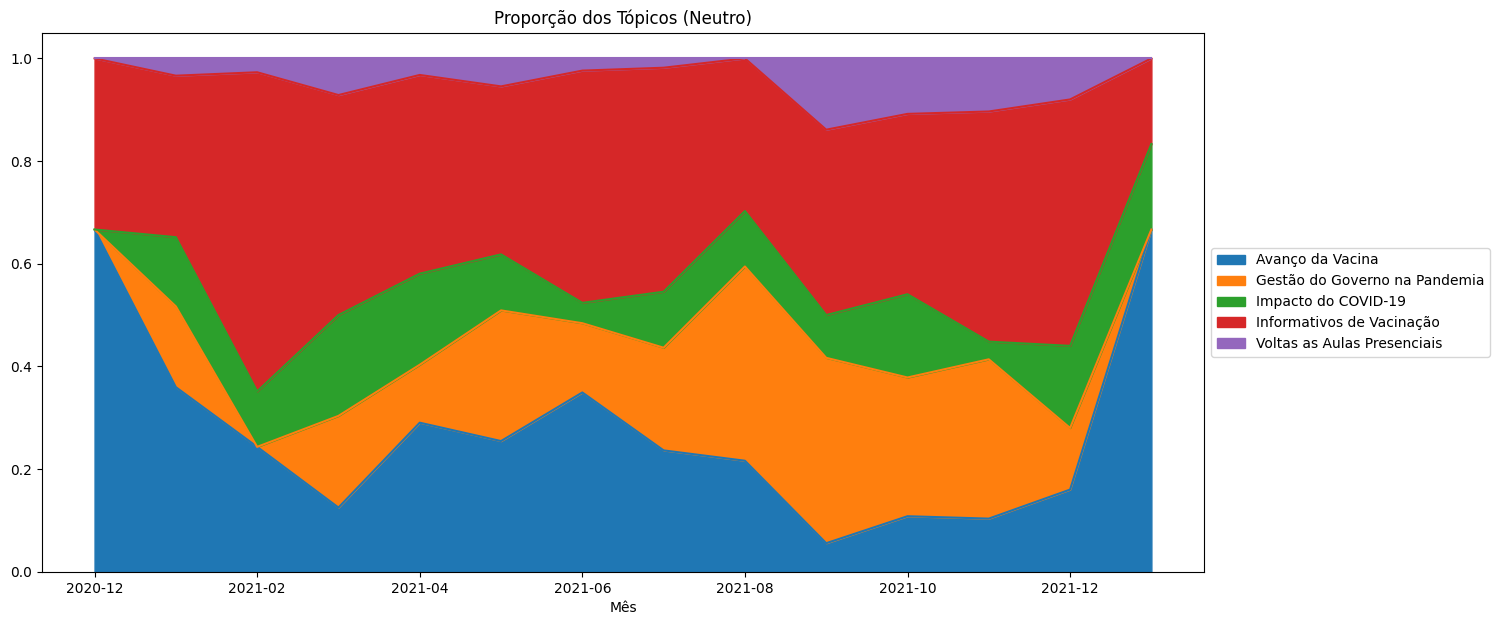

In [26]:

df_topics_count = df_documents[df_documents['government_or_opposition_position'] == 'Neutro'].groupby(['created_at', 'CustomName'])['CustomName'].count().unstack(level=1)
df_topics_count.divide(df_topics_count.sum(axis=1), axis=0).plot.area(title = 'Proporção dos Tópicos (Neutro)', xlabel='created_at', figsize=(15,7))
plt.xlabel('Mês')
plt.legend(title='Tópico')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

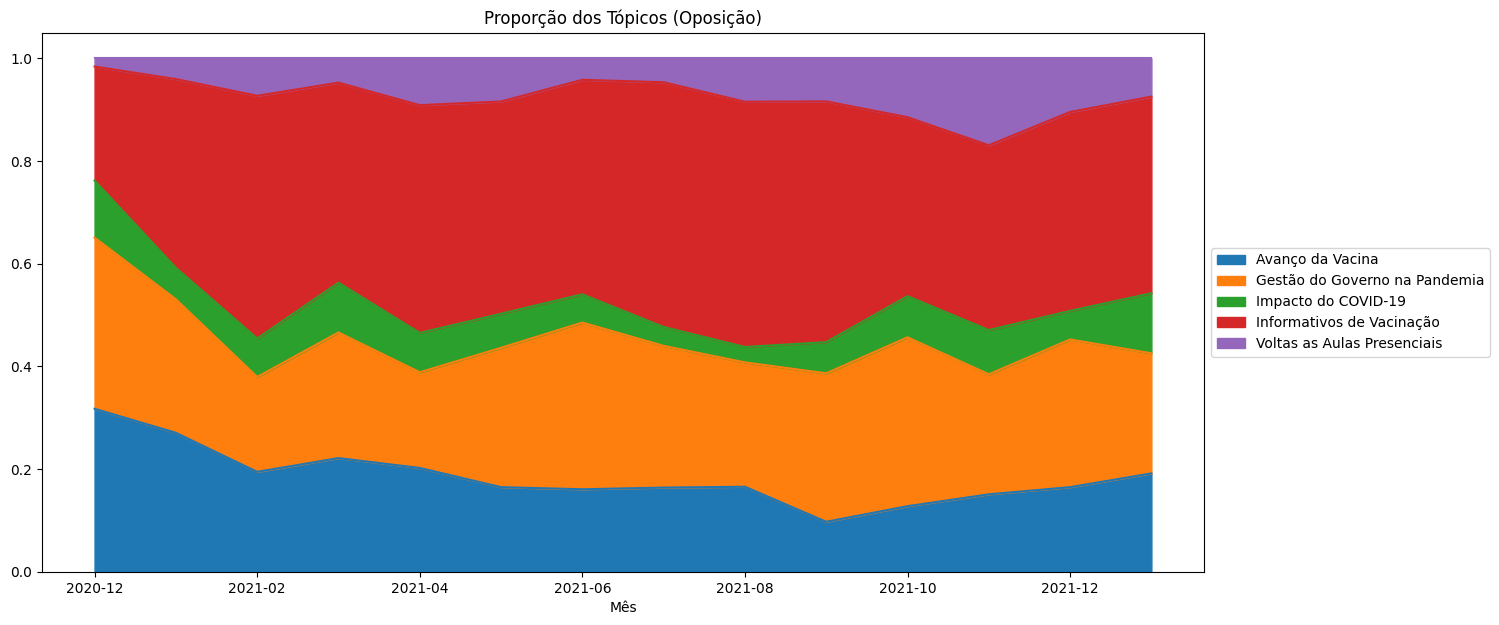

In [27]:

df_topics_count = df_documents[df_documents['government_or_opposition_position'] == 'Oposição'].groupby(['created_at', 'CustomName'])['CustomName'].count().unstack(level=1)
df_topics_count.divide(df_topics_count.sum(axis=1), axis=0).plot.area(title = 'Proporção dos Tópicos (Oposição)', xlabel='created_at', figsize=(15,7))
plt.xlabel('Mês')
plt.legend(title='Tópico')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Distribuição dos Tópicos por Partido

#### Governo

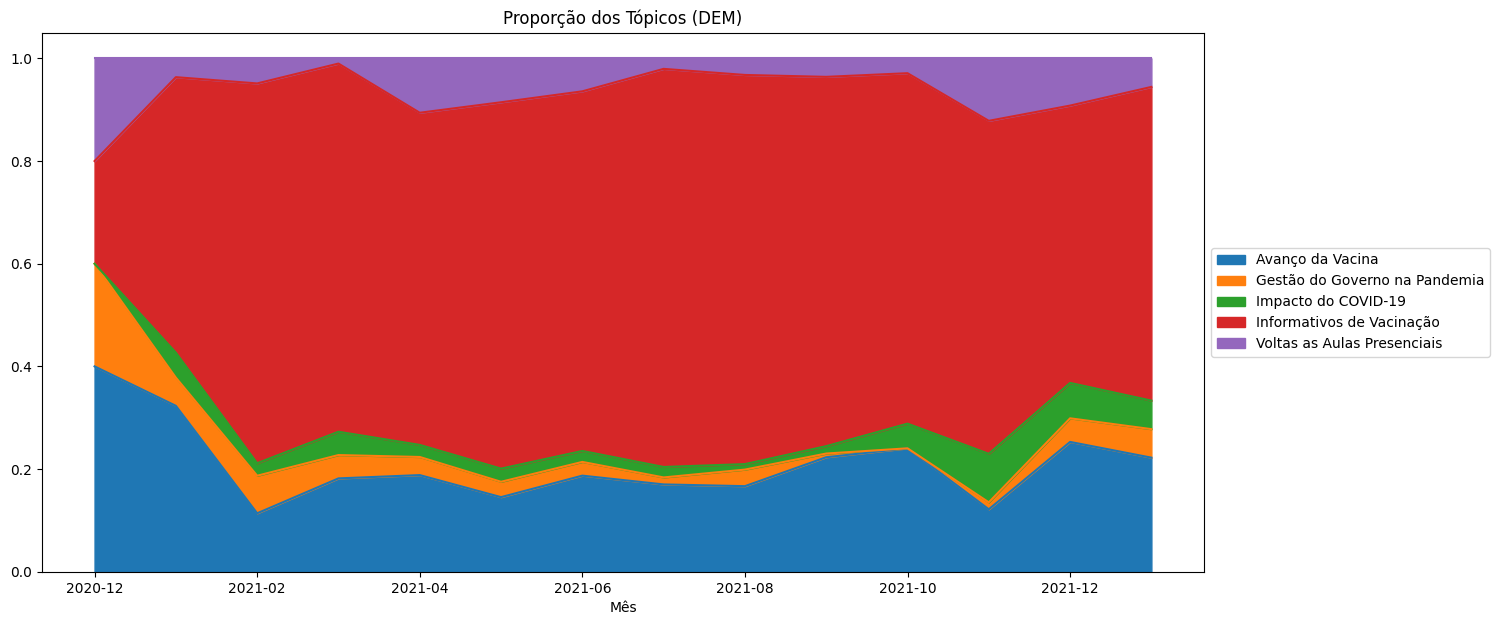

In [28]:
df_topics_count = df_documents[df_documents['party'] == 'DEM'].groupby(['created_at', 'CustomName'])['CustomName'].count().unstack(level=1)
df_topics_count.divide(df_topics_count.sum(axis=1), axis=0).plot.area(title = 'Proporção dos Tópicos (DEM)', xlabel='created_at', figsize=(15,7))
plt.xlabel('Mês')
plt.legend(title='Tópico')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

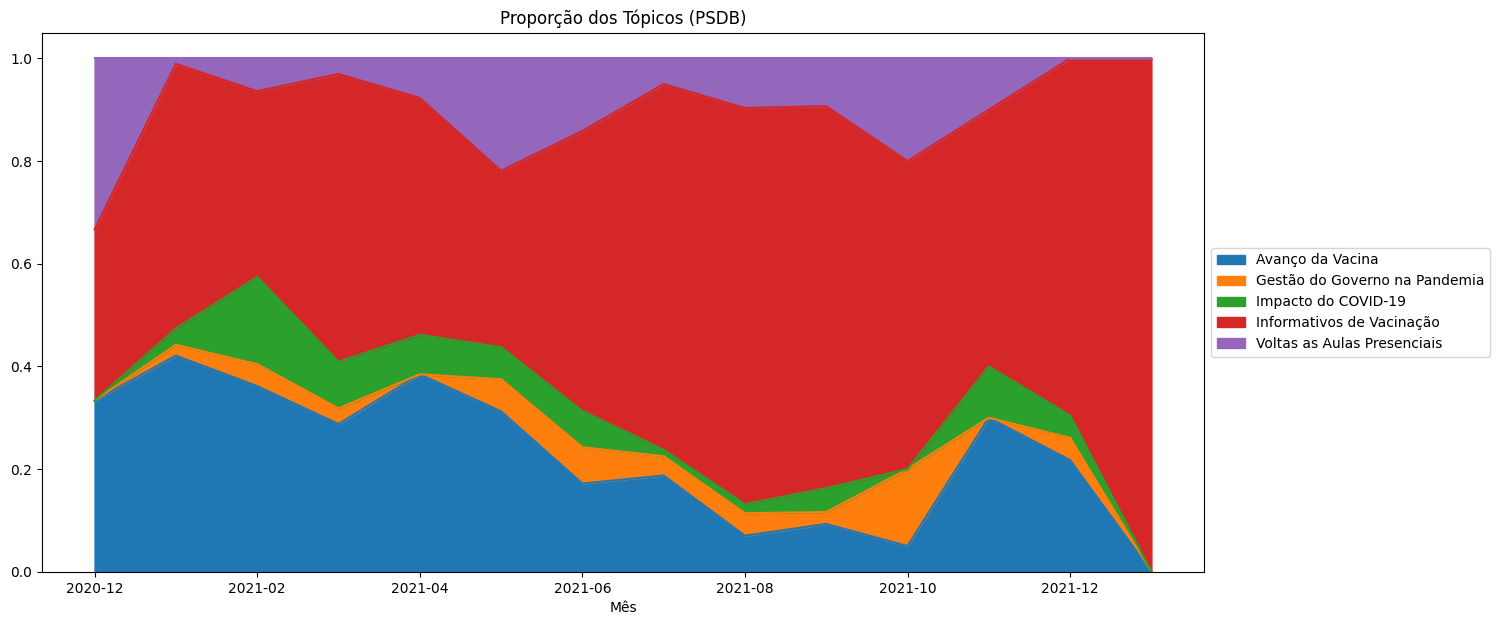

In [29]:
df_topics_count = df_documents[df_documents['party'] == 'PSDB'].groupby(['created_at', 'CustomName'])['CustomName'].count().unstack(level=1)
df_topics_count.divide(df_topics_count.sum(axis=1), axis=0).plot.area(title = 'Proporção dos Tópicos (PSDB)', xlabel='created_at', figsize=(15,7))
plt.xlabel('Mês')
plt.legend(title='Tópico')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

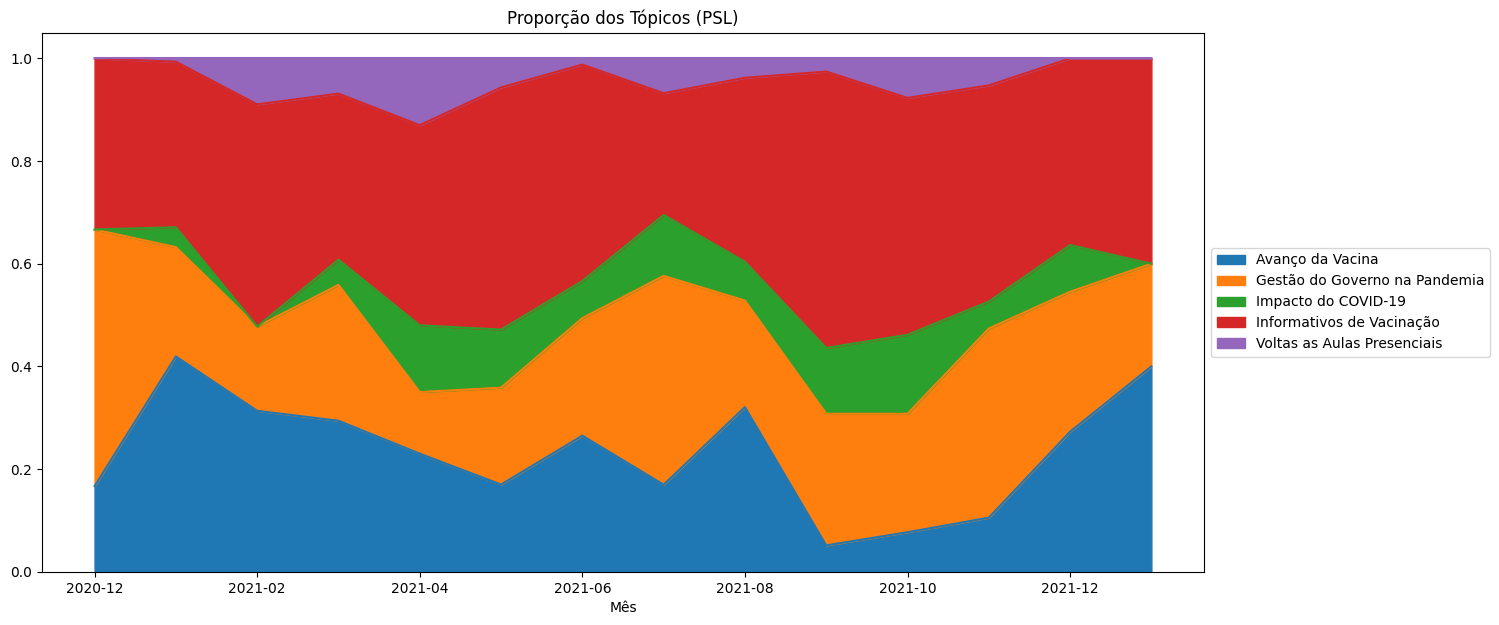

In [30]:
df_topics_count = df_documents[df_documents['party'] == 'PSL'].groupby(['created_at', 'CustomName'])['CustomName'].count().unstack(level=1)
df_topics_count.divide(df_topics_count.sum(axis=1), axis=0).plot.area(title = 'Proporção dos Tópicos (PSL)', xlabel='created_at', figsize=(15,7))
plt.xlabel('Mês')
plt.legend(title='Tópico')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### Oposição

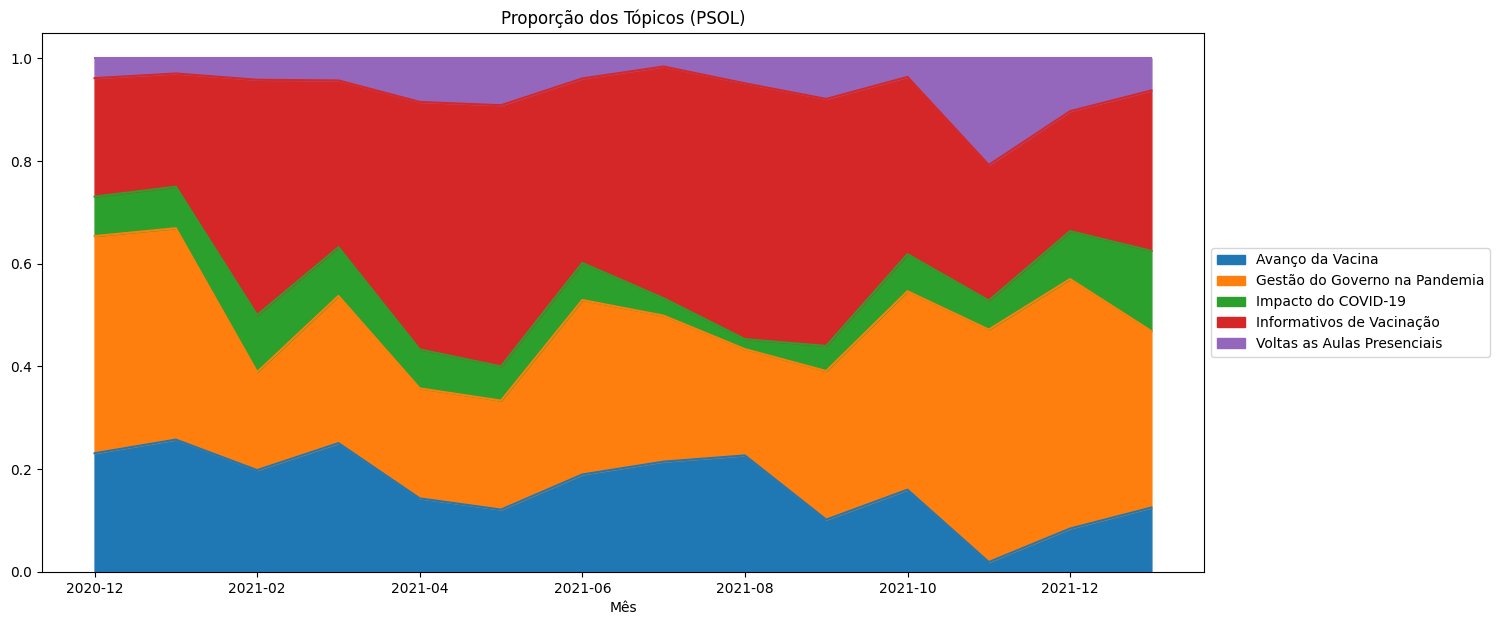

In [31]:
df_topics_count = df_documents[df_documents['party'] == 'PSOL'].groupby(['created_at', 'CustomName'])['CustomName'].count().unstack(level=1)
df_topics_count.divide(df_topics_count.sum(axis=1), axis=0).plot.area(title = 'Proporção dos Tópicos (PSOL)', xlabel='created_at', figsize=(15,7))
plt.xlabel('Mês')
plt.legend(title='Tópico')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

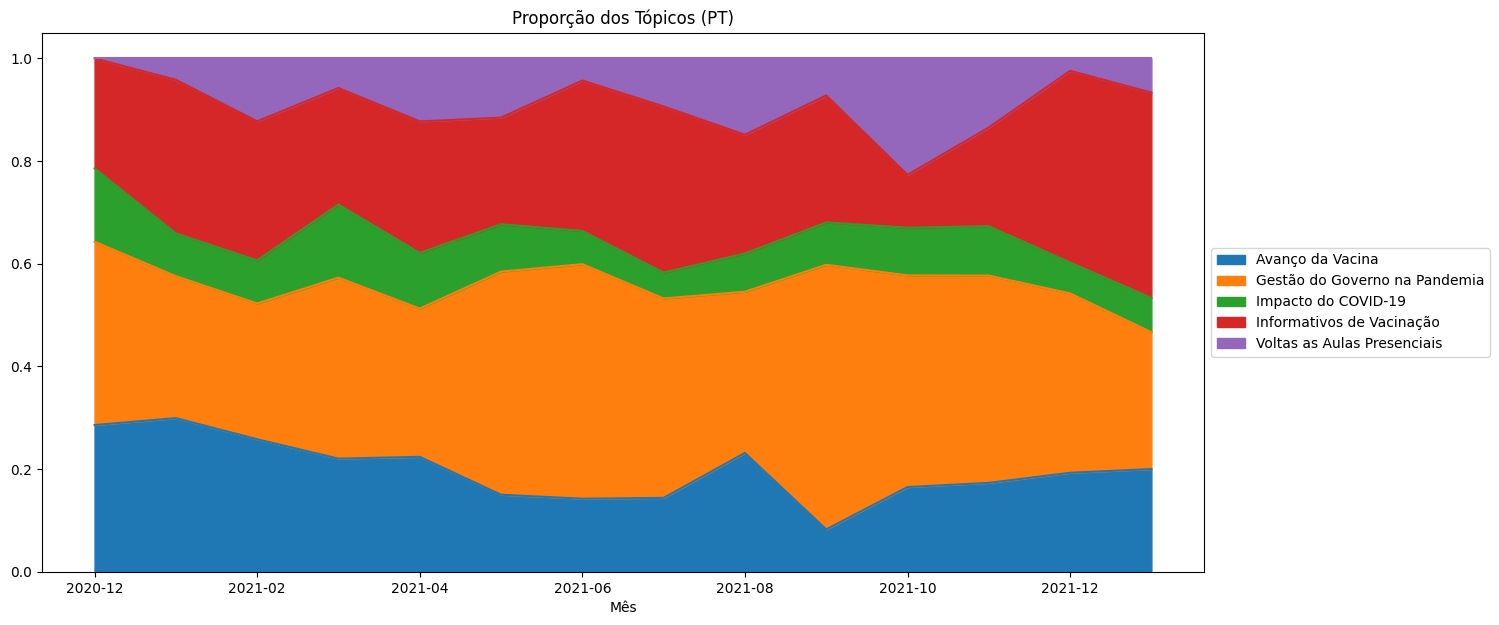

In [32]:
df_topics_count = df_documents[df_documents['party'] == 'PT'].groupby(['created_at', 'CustomName'])['CustomName'].count().unstack(level=1)
df_topics_count.divide(df_topics_count.sum(axis=1), axis=0).plot.area(title = 'Proporção dos Tópicos (PT)', xlabel='created_at', figsize=(15,7))
plt.xlabel('Mês')
plt.legend(title='Tópico')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

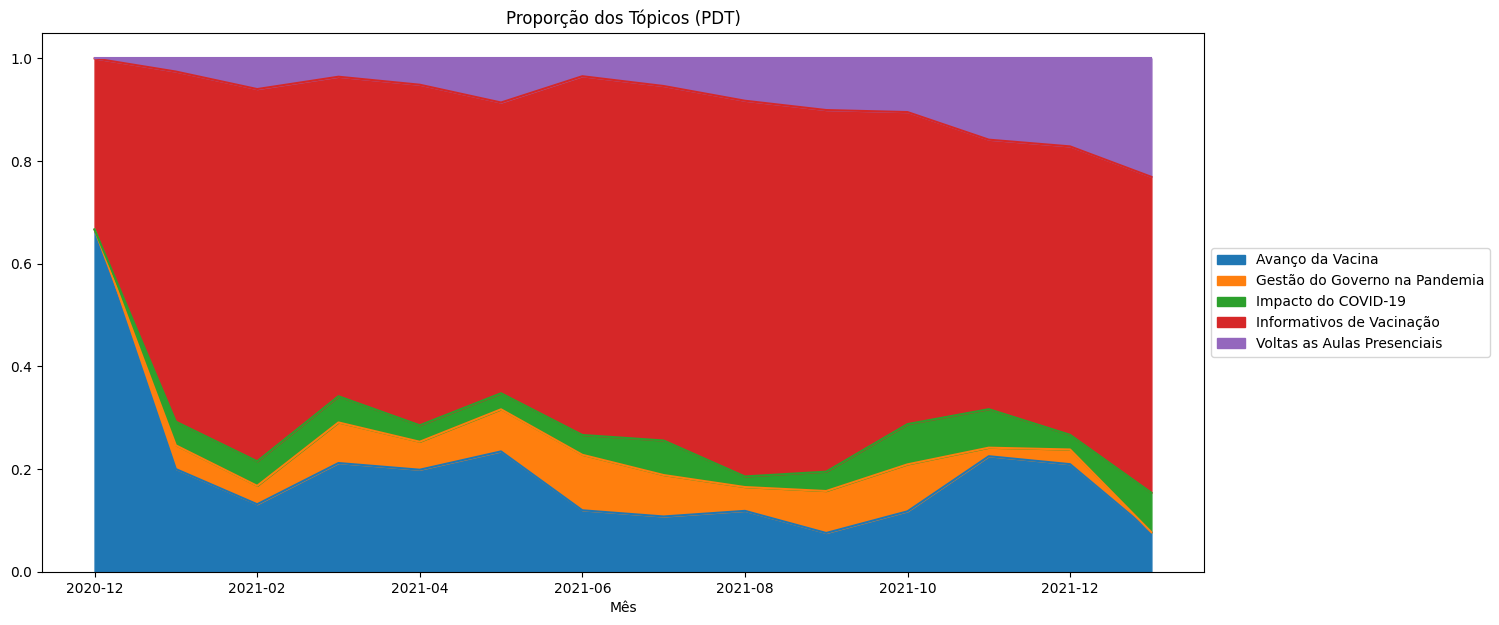

In [33]:
df_topics_count = df_documents[df_documents['party'] == 'PDT'].groupby(['created_at', 'CustomName'])['CustomName'].count().unstack(level=1)
df_topics_count.divide(df_topics_count.sum(axis=1), axis=0).plot.area(title = 'Proporção dos Tópicos (PDT)', xlabel='created_at', figsize=(15,7))
plt.xlabel('Mês')
plt.legend(title='Tópico')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Propoção por Autores

#### Governo

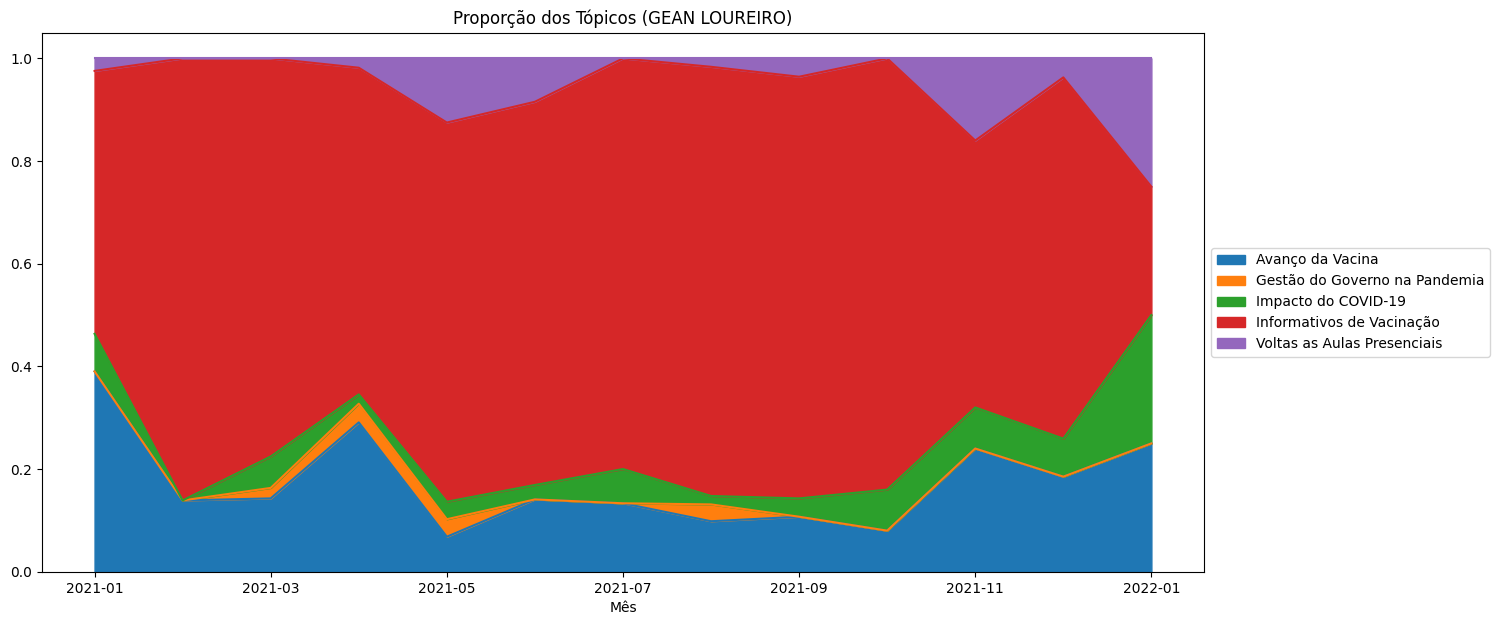

In [34]:
df_topics_count = df_documents[df_documents['nome_urna'] == 'GEAN LOUREIRO'].groupby(['created_at', 'CustomName'])['CustomName'].count().unstack(level=1)
df_topics_count.divide(df_topics_count.sum(axis=1), axis=0).plot.area(title = 'Proporção dos Tópicos (GEAN LOUREIRO)', xlabel='created_at', figsize=(15,7))
plt.xlabel('Mês')
plt.legend(title='Tópico')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

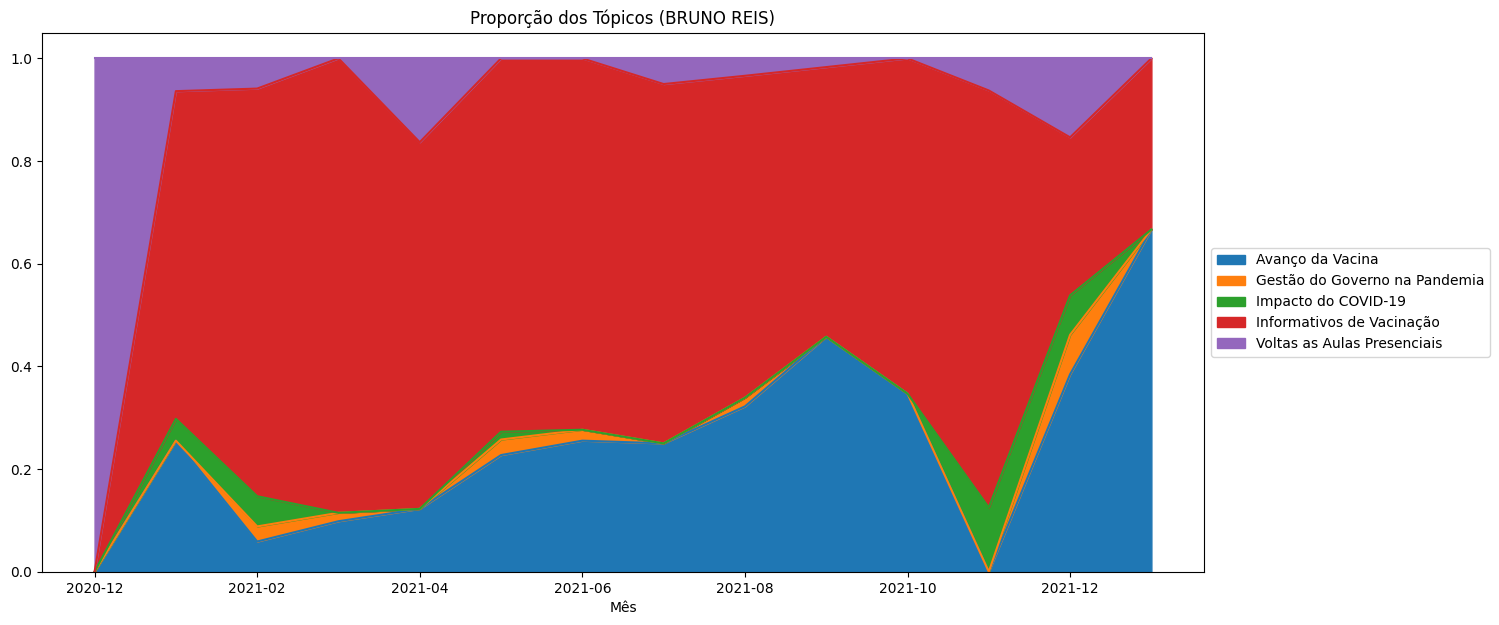

In [35]:
df_topics_count = df_documents[df_documents['nome_urna'] == 'BRUNO REIS'].groupby(['created_at', 'CustomName'])['CustomName'].count().unstack(level=1)
df_topics_count.divide(df_topics_count.sum(axis=1), axis=0).plot.area(title = 'Proporção dos Tópicos (BRUNO REIS)', xlabel='created_at', figsize=(15,7))
plt.xlabel('Mês')
plt.legend(title='Tópico')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

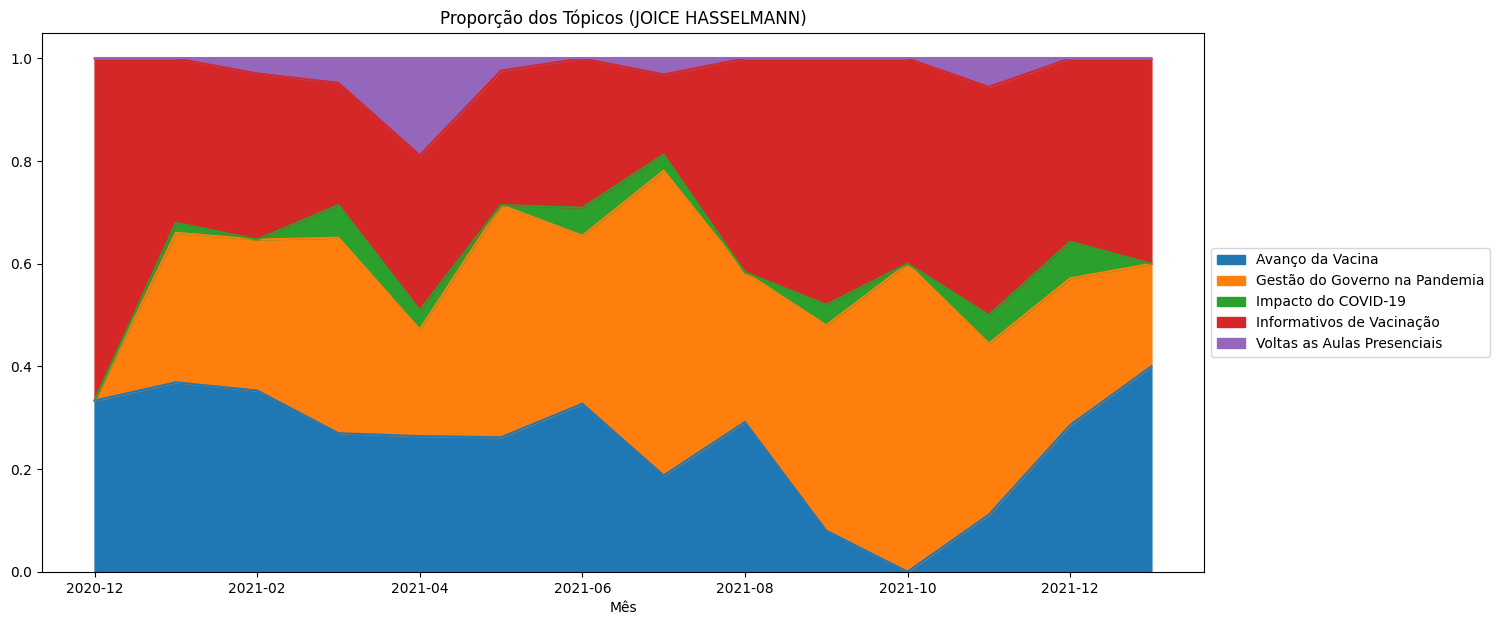

In [36]:
df_topics_count = df_documents[df_documents['nome_urna'] == 'JOICE HASSELMANN'].groupby(['created_at', 'CustomName'])['CustomName'].count().unstack(level=1)
df_topics_count.divide(df_topics_count.sum(axis=1), axis=0).plot.area(title = 'Proporção dos Tópicos (JOICE HASSELMANN)', xlabel='created_at', figsize=(15,7))
plt.xlabel('Mês')
plt.legend(title='Tópico')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### Oposição

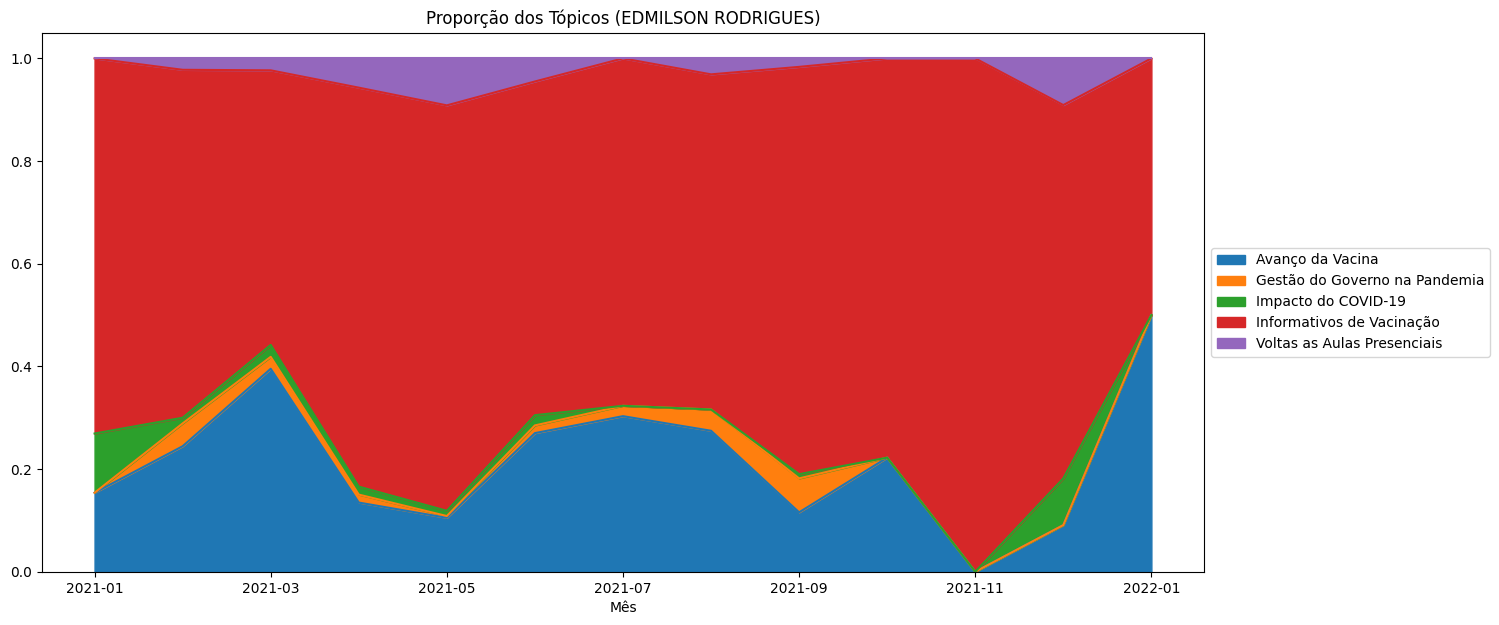

In [37]:
df_topics_count = df_documents[df_documents['nome_urna'] == 'EDMILSON RODRIGUES'].groupby(['created_at', 'CustomName'])['CustomName'].count().unstack(level=1)
df_topics_count.divide(df_topics_count.sum(axis=1), axis=0).plot.area(title = 'Proporção dos Tópicos (EDMILSON RODRIGUES)', xlabel='created_at', figsize=(15,7))
plt.xlabel('Mês')
plt.legend(title='Tópico')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

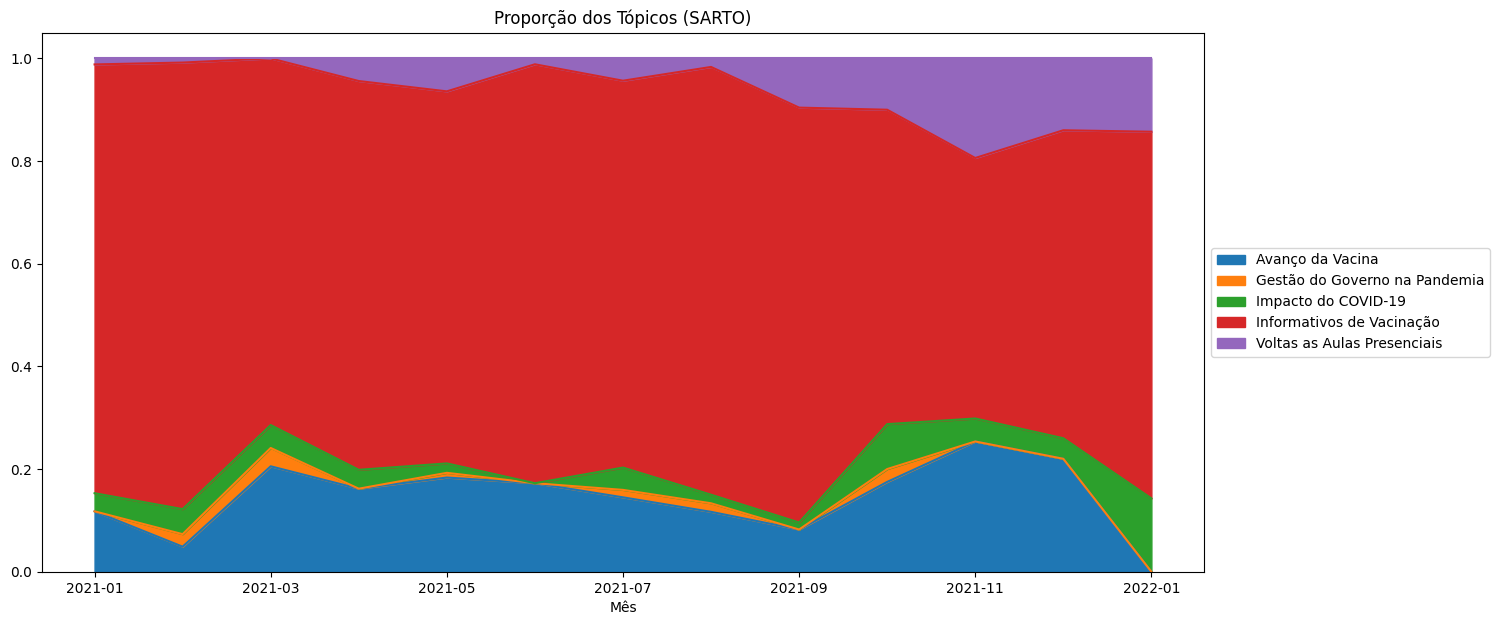

In [38]:
df_topics_count = df_documents[df_documents['nome_urna'] == 'SARTO'].groupby(['created_at', 'CustomName'])['CustomName'].count().unstack(level=1)
df_topics_count.divide(df_topics_count.sum(axis=1), axis=0).plot.area(title = 'Proporção dos Tópicos (SARTO)', xlabel='created_at', figsize=(15,7))
plt.xlabel('Mês')
plt.legend(title='Tópico')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

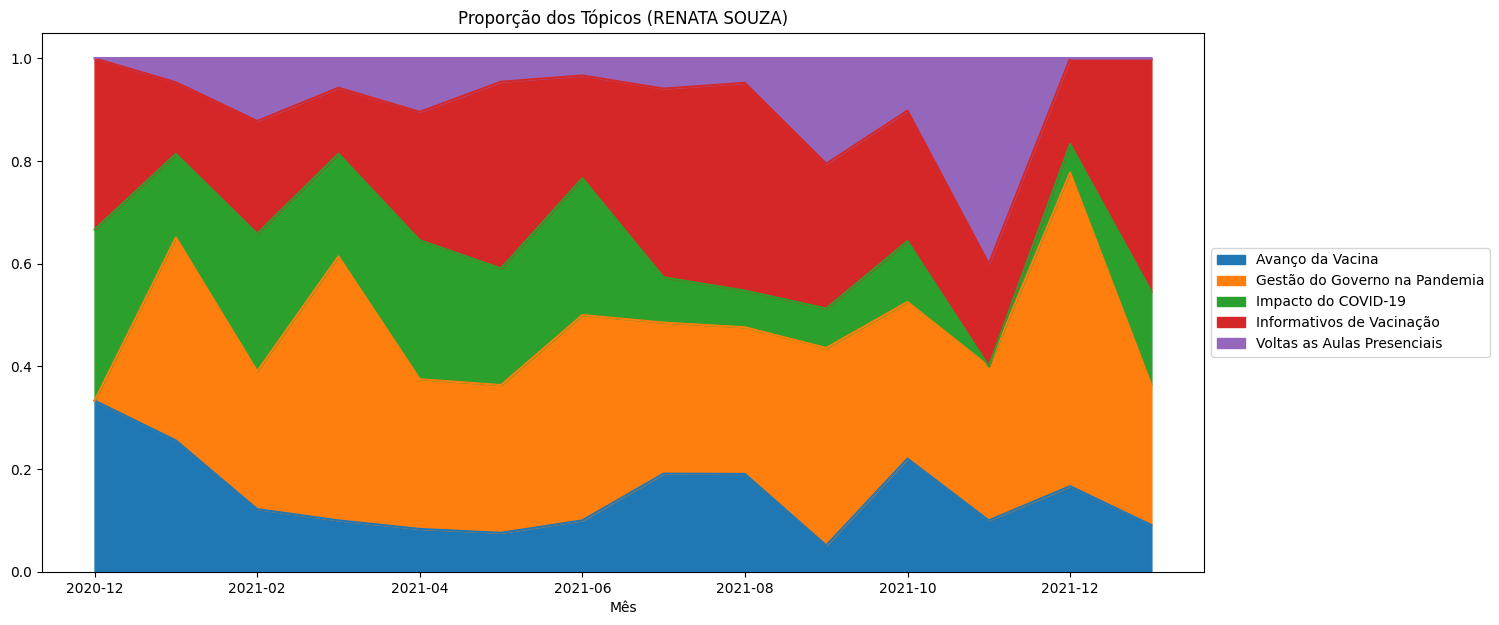

In [39]:
df_topics_count = df_documents[df_documents['nome_urna'] == 'RENATA SOUZA'].groupby(['created_at', 'CustomName'])['CustomName'].count().unstack(level=1)
df_topics_count.divide(df_topics_count.sum(axis=1), axis=0).plot.area(title = 'Proporção dos Tópicos (RENATA SOUZA)', xlabel='created_at', figsize=(15,7))
plt.xlabel('Mês')
plt.legend(title='Tópico')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Discurso Central

In [83]:
def mean_of_lists(lists):
    # Converte listas para array numpy para facilitar a média
    arrays = np.array(lists.tolist())
    return arrays.mean(axis=0)


def discurso_central(df, grupos):
    """
    Agrega a lista de probabilidades agrupando por 'created_at' e múltiplas colunas de grupos.
    
    Args:
        df (pd.DataFrame): DataFrame de entrada contendo as colunas 'created_at', grupos e 'lista_prob'.
        grupos (str ou list): Uma coluna (str) ou lista de colunas (list) para realizar o agrupamento.

    Returns:
        pd.DataFrame: DataFrame resultante com as agregações.
    """
    # Garantir que grupos seja uma lista
    if not isinstance(grupos, list):
        grupos = [grupos]
    
    # Realizar o agrupamento e aplicar a função mean_of_lists
    df_final = df.groupby(grupos)['lista_prob'].agg(lambda x: mean_of_lists(x)).reset_index()
    
    return df_final

## Diversidade

In [84]:
def calcula_diversidade(row):
    diversidade = 0.0
    for values in row:
        diversidade += values * math.log(values)
    diversidade = -1 * diversidade
    return diversidade

### Diversidade dos discursos por posicionamento ao longo do tempo

- Quanto maior a diversidade os discursos de determinado grupo, mais tópicos são abordados. Da mesma forma um grupo que é menos diverso, menos tópicos são abordados.

- Na diversidade dos discursos dos grupos governo e oposição é notável que seguem um mesmo padrão em relação ao momento em  que estão falando sobre diversos tópicos similtaneamente e momentos em que focam em tópicos especificos.
- Podemos olhar para os discursos entre o perído 2021-07 e 2021-09 para identificar qual era o tópico com maior foco. 
- Durante o ano o tópico dominante foi calandário vacinal, mas até meados de abril, o Brasil continuava a bater recordes em relação a casos de covid. A partir de abril, houve uma redução significativa dos casos, e os discursos ficaram mais especifícos em calendário vacinal e gestão do governo.
- O pico que existe nos últimos meses do período é causado pelo quantidade baixa de discursos nesse período?  

In [85]:
# Defina o grupo que deseja analisar
dc_diversidade_position = discurso_central(df_documents, [df_documents['created_at'], df_documents['government_or_opposition_position']])
dc_diversidade_position['diversidade'] = dc_diversidade_position['lista_prob'].apply(calcula_diversidade)

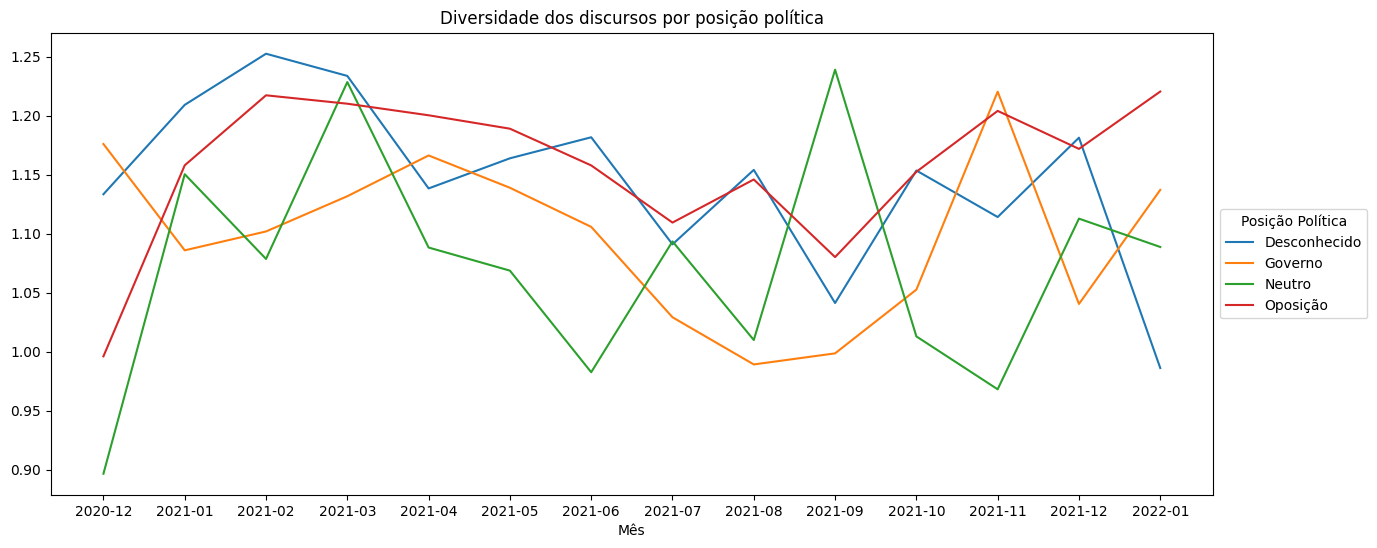

In [120]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=dc_diversidade_position, x='created_at', y='diversidade', hue='government_or_opposition_position')
plt.title('Diversidade dos discursos por posição política')
plt.xlabel('Mês')
plt.ylabel('')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Posição Política')

### Diversidade dos discursos por partido ao longo do tempo

In [44]:
df_diversidade_party = discurso_central(df_documents, df_documents['party'])
df_diversidade_party['Diversidade'] = df_diversidade_party['lista_prob'].apply(calcula_diversidade)
df_diversidade_party = df_diversidade_party[df_diversidade_party.Diversidade > 0.6]

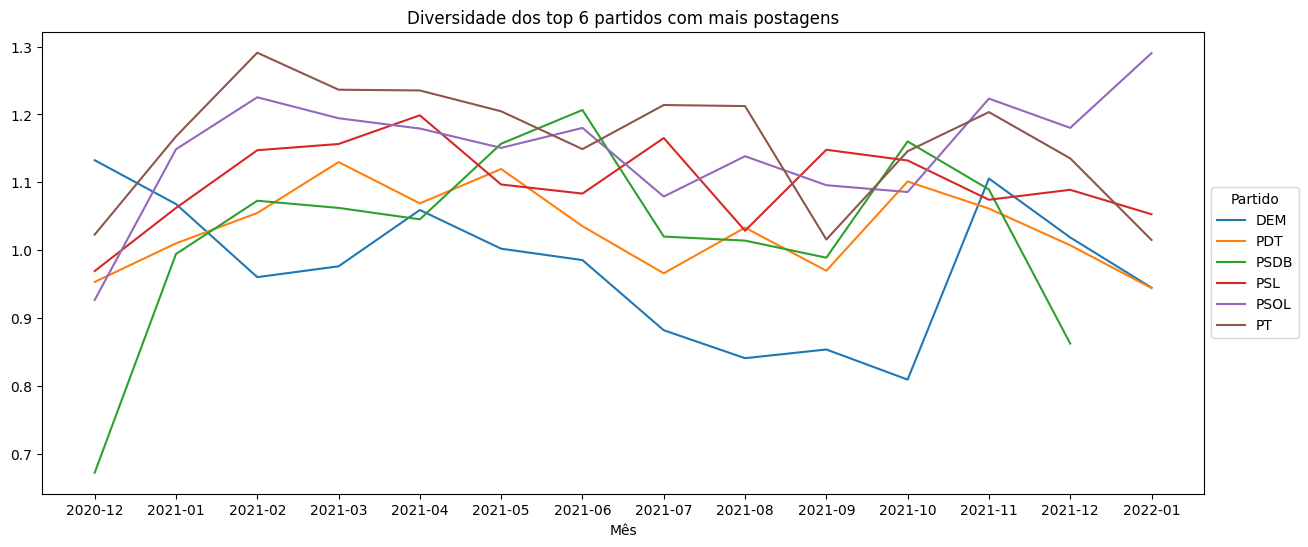

In [45]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_diversidade_party.loc[df_diversidade_party['party'].isin(postagem_per_partido_Oposicao + postagem_per_partido_Governo)], x='created_at', y='Diversidade', hue='party')
plt.title('Diversidade dos top 6 partidos com mais postagens')
plt.xlabel('Mês')
plt.ylabel('')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Partido')

### Diversidade dos discursos por Candidato ao longo do tempo

In [46]:
df_diversidade_candidato = discurso_central(df_documents, df_documents['nome_urna'])
df_diversidade_candidato['Diversidade'] = df_diversidade_candidato['lista_prob'].apply(calcula_diversidade)

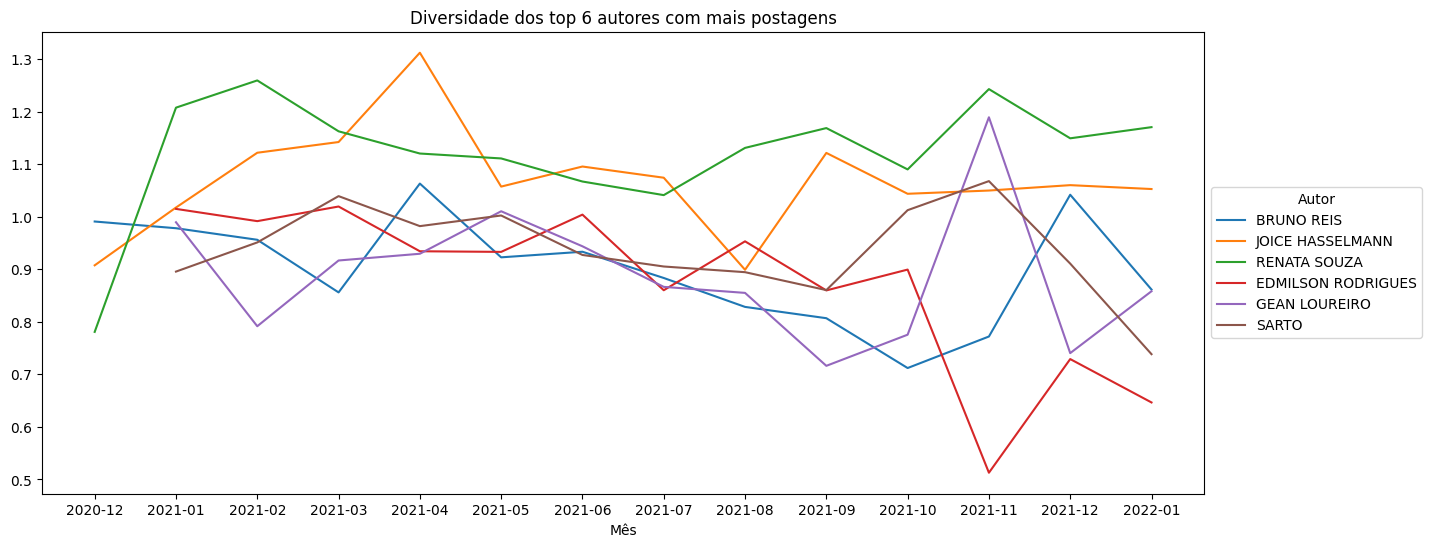

In [47]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_diversidade_candidato.loc[df_diversidade_candidato['nome_urna'].isin(postagem_per_candidadato_Oposicao + postagem_per_candidadato_Governo)], x='created_at', y='Diversidade', hue='nome_urna')
plt.title('Diversidade dos top 6 autores com mais postagens')
plt.xlabel('Mês')
plt.ylabel('')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Autor')

## Coesão

In [48]:
def calcula_coesao(cd_grupo, subgrupo):
    
    l1_norm = np.linalg.norm(np.array(subgrupo - np.array(cd_grupo)),
            ord=1,
            axis=1
        ) 
    coesao = (-1 / len(subgrupo)) * np.sum(l1_norm)
    
    return coesao

### Coesão dos discursos dos partidos em relação ao discurso central do posicionamento do partido 

In [ ]:
# Defina o grupo que deseja analisar
# Defina o subgrupo que deseja analisar
cd_posicionamento = discurso_central(df_documents, df_documents['created_at'] ,df_documents['government_or_opposition_position'])
subgrupo_partido = pd.DataFrame(df_documents.groupby(['created_at', 'party', 'government_or_opposition_position'])['lista_prob'].agg(np.stack)).reset_index()

df_coesao_partido = pd.merge(subgrupo_partido, cd_posicionamento, on=['created_at', 'government_or_opposition_position'], suffixes=('_2', '_1'))

df_coesao_partido['coesao'] = df_coesao_partido.apply(lambda x: calcula_coesao(x['lista_prob_1'], x['lista_prob_2']), axis=1)

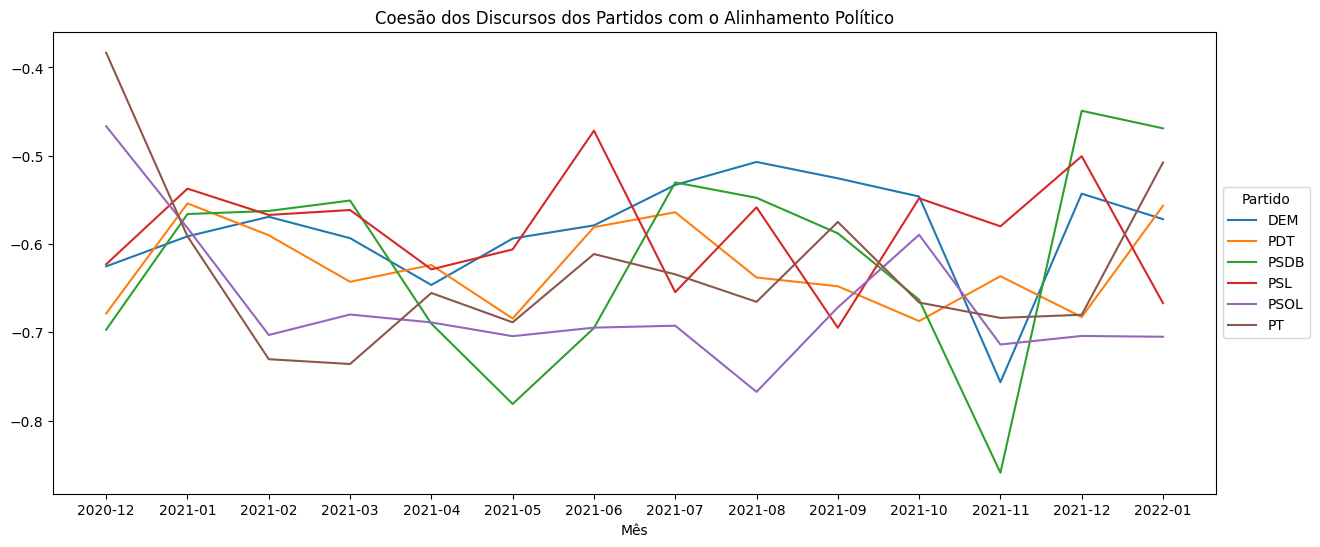

In [50]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_coesao_partido.loc[df_coesao_partido['party'].isin(postagem_per_partido_Oposicao + postagem_per_partido_Governo)], x='created_at', y='coesao', hue='party')
plt.title('Coesão dos Discursos dos Partidos com o Alinhamento Político')
plt.xlabel('Mês')
plt.ylabel('')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Partido')

### Coesão dos discursos dos candidatos em relação ao discurso central do posicionamento do candidato 

In [51]:
cd_posicionamento = discurso_central(df_documents, df_documents['government_or_opposition_position'])
subgrupo_candidato = pd.DataFrame(df_documents.groupby(['created_at', 'nome_urna', 'government_or_opposition_position'])['lista_prob'].agg(np.stack)).reset_index()

df_coesao_candidato = pd.merge(subgrupo_candidato, cd_posicionamento, on=['created_at', 'government_or_opposition_position'], suffixes=('_2', '_1'))

df_coesao_candidato['coesao'] = df_coesao_candidato.apply(lambda x: calcula_coesao(x['lista_prob_1'], x['lista_prob_2']), axis=1)

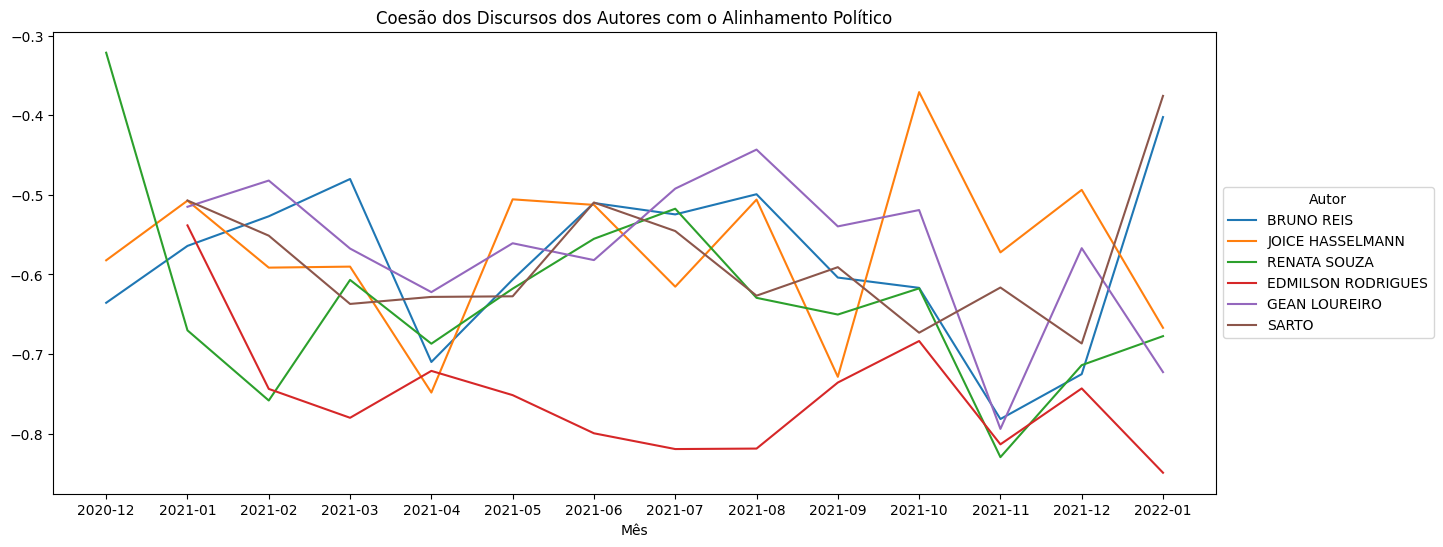

In [52]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_coesao_candidato.loc[df_coesao_candidato['nome_urna'].isin(postagem_per_candidadato_Governo + postagem_per_candidadato_Oposicao)], x='created_at', y='coesao', hue='nome_urna')
plt.title('Coesão dos Discursos dos Autores com o Alinhamento Político')
plt.xlabel('Mês')
plt.ylabel('')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Autor')

## Coerência

In [53]:
def CalculaCoerencia(valores_grupo):
   return -1 * np.mean(np.var(np.stack(valores_grupo), axis=0))


### Coerência por Partido

Text(0, 0.5, 'Partido')

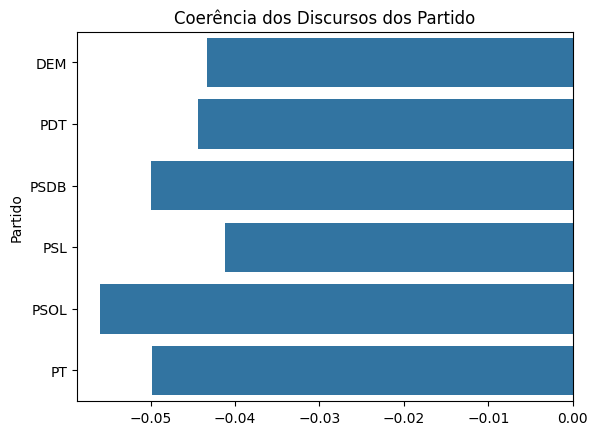

In [116]:
coerencia_partido = pd.DataFrame(df_documents.groupby(['party'])['lista_prob'].agg(np.stack)).reset_index()
coerencia_partido['Coerencia'] = coerencia_partido['lista_prob'].apply(CalculaCoerencia)

sns.barplot(x='Coerencia', y='party', data=coerencia_partido[coerencia_partido['party'].isin(postagem_per_partido_Oposicao + postagem_per_partido_Governo)], orient='h')
plt.title('Coerência dos Discursos dos Partido')
plt.xlabel('')
plt.ylabel('Partido')

### Coerência por Autor

Text(0, 0.5, 'Autor')

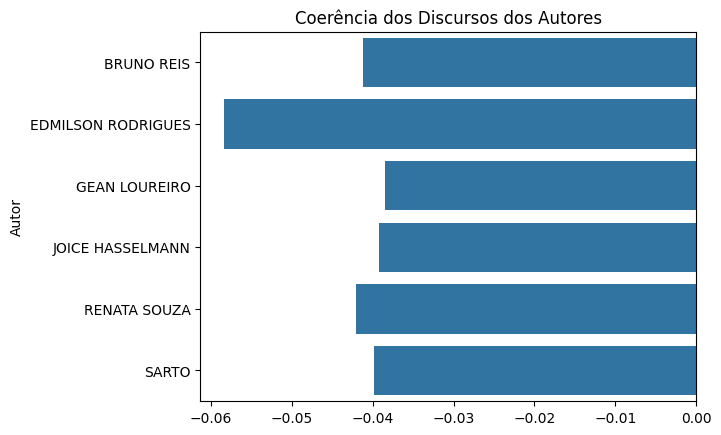

In [117]:
coerencia_candidato = pd.DataFrame(df_documents.groupby(['nome_urna'])['lista_prob'].agg(np.stack)).reset_index()
coerencia_candidato['Coerencia'] = coerencia_candidato['lista_prob'].apply(CalculaCoerencia)

sns.barplot(x='Coerencia', y='nome_urna', data=coerencia_candidato[coerencia_candidato['nome_urna'].isin(postagem_per_candidadato_Governo + postagem_per_candidadato_Oposicao)], orient='h')
plt.title('Coerência dos Discursos dos Autores')
plt.xlabel('')
plt.ylabel('Autor')

## Dissonância

In [78]:
def calculate_dissonance_formula(values, lista_prob, weight_vector):
    return np.sqrt(np.sum(np.multiply(np.square(np.subtract(values, lista_prob)), weight_vector)))

def calculateWeightVector(lista_prob):
    indexed_values = [(value, index) for index, value in enumerate(lista_prob)]
    sorted_values = sorted(indexed_values, key=lambda x: x[0])
    sorted_indexes = [0] * len(sorted_values)
    
    for index, value in enumerate(sorted_values):
        sorted_indexes[value[1]] = index + 1
    
    weight_vector = np.log(np.array(sorted_indexes)) + 1

    return weight_vector

In [ ]:
cd_grupo = discurso_central(df_documents, df_documents['government_or_opposition_position'])
cd_grupo_partido = discurso_central(df_documents, [df_documents['party'], df_documents['government_or_opposition_position']])

def calculaDissonancia(cd_grupo, cd_grupo_entidade):
    cd_grupo['weight_vector'] = cd_grupo['lista_prob'].apply(calculateWeightVector)

    discourses = pd.merge(cd_grupo_entidade, cd_grupo, on='government_or_opposition_position')
    print(discourses.info())

    discourses['dissonancia'] = discourses.apply(lambda row: calculate_dissonance_formula(row['lista_prob_x'], row['lista_prob_y'], row['weight_vector']), axis=1)
    
    return discourses
    

In [ ]:
dissonancia_partido = calculaDissonancia(cd_grupo, cd_grupo_partido)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   party                              23 non-null     object
 1   government_or_opposition_position  23 non-null     object
 2   lista_prob_x                       23 non-null     object
 3   lista_prob_y                       23 non-null     object
 4   weight_vector                      23 non-null     object
dtypes: object(5)
memory usage: 1.0+ KB
None


Text(0, 0.5, 'Partido')

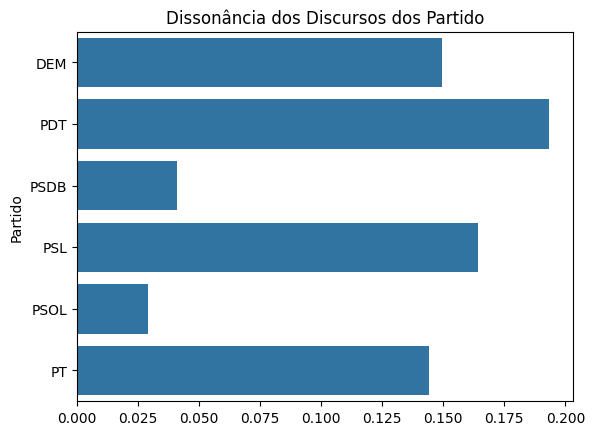

In [118]:
sns.barplot(x='dissonancia', y='party', data=dissonancia_partido[dissonancia_partido['party'].isin(postagem_per_partido_Oposicao + postagem_per_partido_Governo)], orient='h')
plt.title('Dissonância dos Discursos dos Partido')
plt.xlabel('')
plt.ylabel('Partido')

In [110]:
cd_grupo = discurso_central(df_documents, df_documents['government_or_opposition_position'])
cd_grupo_candidato = discurso_central(df_documents, [df_documents['nome_urna'], df_documents['government_or_opposition_position']])

dissonancia_candidato = calculaDissonancia(cd_grupo, cd_grupo_candidato)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   nome_urna                          175 non-null    object
 1   government_or_opposition_position  175 non-null    object
 2   lista_prob_x                       175 non-null    object
 3   lista_prob_y                       175 non-null    object
 4   weight_vector                      175 non-null    object
dtypes: object(5)
memory usage: 7.0+ KB
None


Text(0, 0.5, 'Candidato')

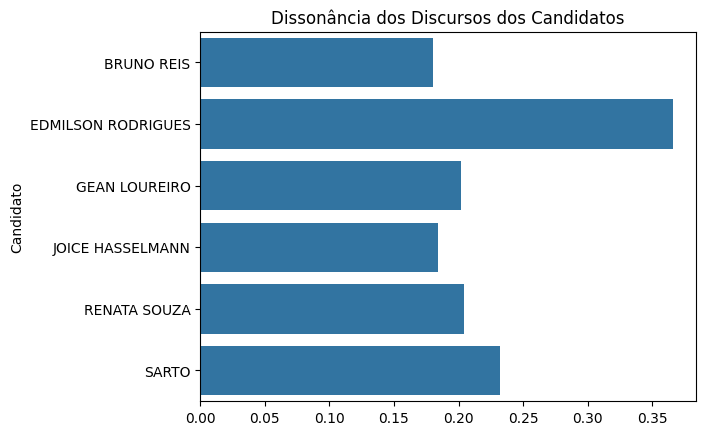

In [119]:
sns.barplot(x='dissonancia', y='nome_urna', data=dissonancia_candidato[dissonancia_candidato['nome_urna'].isin(postagem_per_candidadato_Oposicao + postagem_per_candidadato_Governo)], orient='h')
plt.title('Dissonância dos Discursos dos Candidatos')
plt.xlabel('')
plt.ylabel('Candidato')